# Aula 7 - Exercícios - Storytelling e Correlação
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [1]:
# Importe a biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos baseada no matplotlib

### 7.5 Analise o dataset titanic e encontre duas variáveis que tenham relação com a probabilidade de sobreviência ao acidente com o navio.
#### Plote gráficos com a biblioteca seaborn para mostrar suas conclusões.
#### Use funções do seaborn ou do matplotlib para personalisar e destacar as suas conclusões.
#### Use no máximo 4 células para colocar sua resposta.


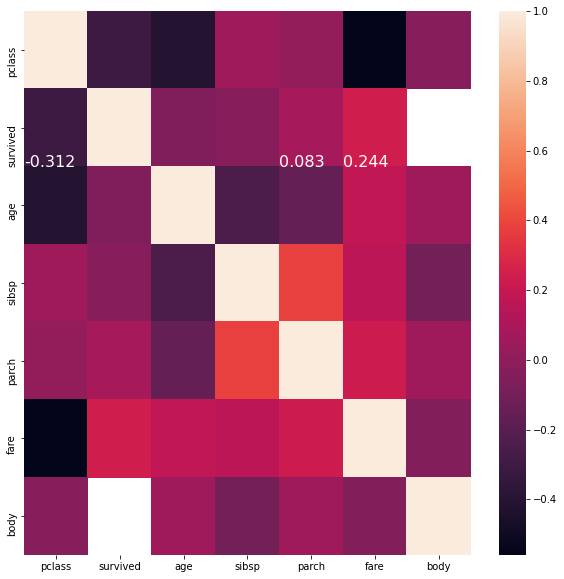

In [2]:
# Faça aqui
path_titanic = '../../curso_ciencia_dados2020/data/originais/titanic/titanic.xls'
titanic = pd.read_excel(path_titanic)

# Computamos a correlação entre as colunas
corr = titanic.corr()

# Exibimos as correlações num heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax)

# Selecionamos e anotamos no gráfico os três maiores valores absolutos
top = pd.melt(corr.loc['survived'].reset_index(), id_vars='index')
top['abs'] = top.value.apply(lambda v: abs(v))
top3 = top.sort_values(by='abs', ascending=False).iloc[1:4]

for i in top3.index:
    ax.annotate(round(top3.loc[i]['value'], 3), (i, 2), fontsize=16, color='#FFFFFF')
    
# Esse gráfico nos leva a concluir que a classe e a tarifa paga pelo passageiro têm maior relação com a 
# probabilidade de sobrevivência. Classe e Tarifa informam, basicamente, a mesma coisa: a altura do deck em
# que se encontrava o passagiero. Por isso, usamos também o terceiro maior valor de correlação: parch, que é o 
# número de pais ou responsáveis acompanhando uma criança. Isso é: crianças nos decks superiores tiveram maior 
# probabilidade de sobrevivência.

/home/stefano/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


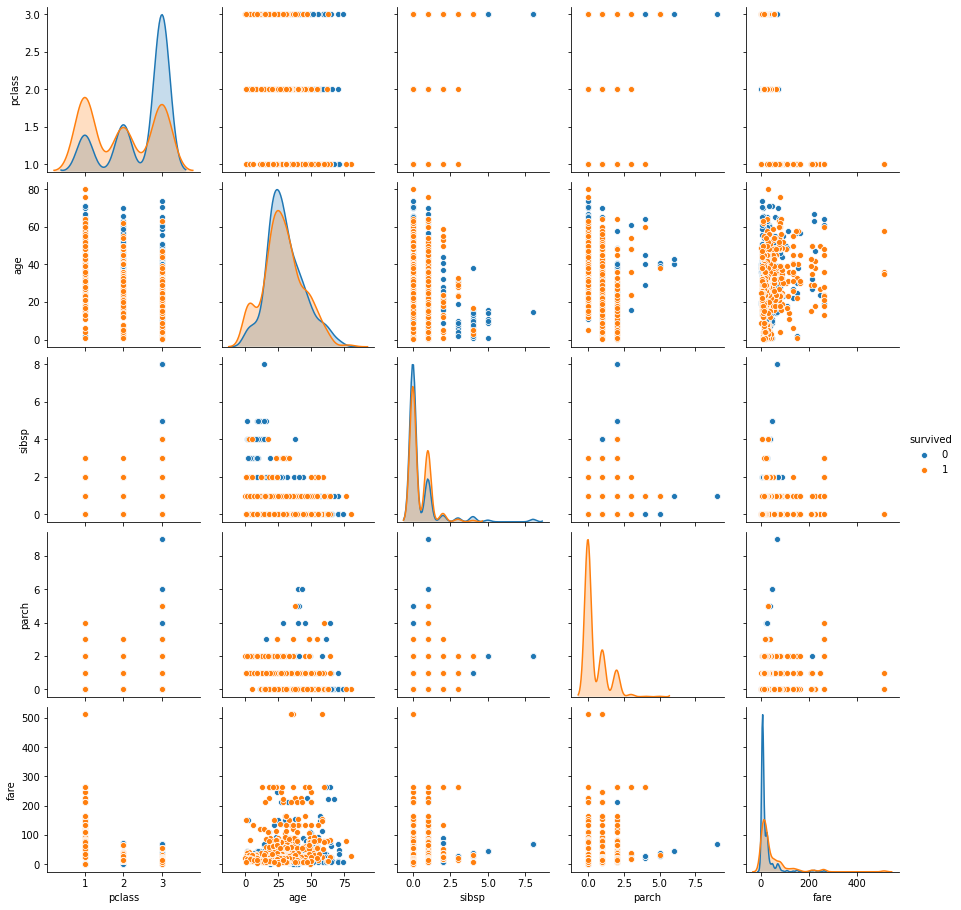

In [3]:
# Faça aqui

# Exibimos o scatterplot de todas as variáveis
sns.pairplot(data=titanic.drop(columns=['body']), hue='survived');

# Nesse pair plot vemos novamente a relação entre Classe/Tarifa (pclass) e Presença de pais/responsáveis (parch),
# reforçando a conclusão da análise do gráfico anterior. Mas aqui também vemos uma relação importante da idade com
# a possibilidade de sobrevivência: pessoas mais velhas, mesmo nas classes superiores, tinham menos chance de 
# sobrevivência.

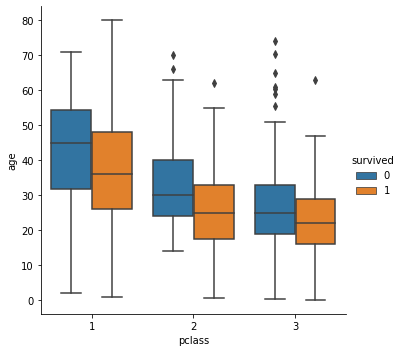

In [4]:
# Faça aqui
sns.catplot(x='pclass', y='age', hue='survived', data=titanic, kind='box')

# Esse gráfico nos mostra que nas classes inferiores, a idade teve um impacto maior na probabilidade de sobrevivência